### Training of ML algorithms on our Original Dataset

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('Datasets/sp500_sentiment_non_weighted.csv')
data.Price_change = data.Price_change.astype(int)
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,1.111477e+07,1136.520020,0.157785,0.489590,0.352625,1
1,1,2010-01-06,9.592200e+06,1137.140015,0.159253,0.114102,0.726645,1
2,2,2010-01-07,1.264640e+07,1141.689941,0.441000,0.012006,0.546994,1
3,3,2010-01-08,1.508503e+07,1144.979980,0.039152,0.384472,0.576376,1
4,4,2010-01-11,7.396000e+06,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...,...
2603,2603,2020-06-05,2.503270e+07,3193.929932,0.567891,0.070503,0.361606,1
2604,2604,2020-06-08,2.303770e+07,3232.389893,0.523481,0.124646,0.351873,1
2605,2605,2020-06-09,2.969893e+07,3207.179932,0.296441,0.337487,0.366072,-1
2606,2606,2020-06-10,3.795272e+07,3190.139893,0.390972,0.240399,0.368628,-1


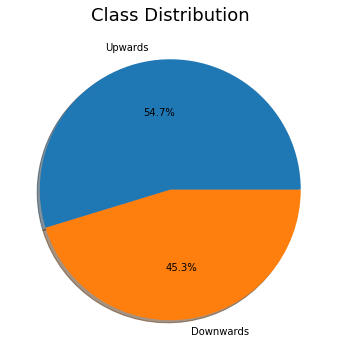

,Unnamed: 0,Volume,Close,Positive,Negative,Neutral,Price_change
count,2608.000000,2.608000e+03,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,1303.500000,1.658071e+07,2011.289005,0.251019,0.178131,0.570850,0.094325
std,753.009075,1.012408e+07,614.019978,0.132117,0.124667,0.156313,0.995732
min,0.000000,9.112000e+03,1022.580017,0.007660,0.008018,0.032180,-1.000000
25%,651.750000,1.015416e+07,1405.375000,0.155623,0.084762,0.471117,-1.000000
50%,1303.500000,1.419585e+07,2021.200012,0.238662,0.156607,0.567077,1.000000
75%,1955.250000,2.006385e+07,2538.672485,0.327286,0.242390,0.672033,1.000000
max,2607.000000,1.087524e+08,3386.149902,0.891684,0.960160,0.949033,1.000000


In [5]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['Upwards','Downwards'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [7]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

#### Evaluation metrics 

In [11]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro')  }
          

### Data points scatter plot. The distribution of data seems almost random without visible patterns. 

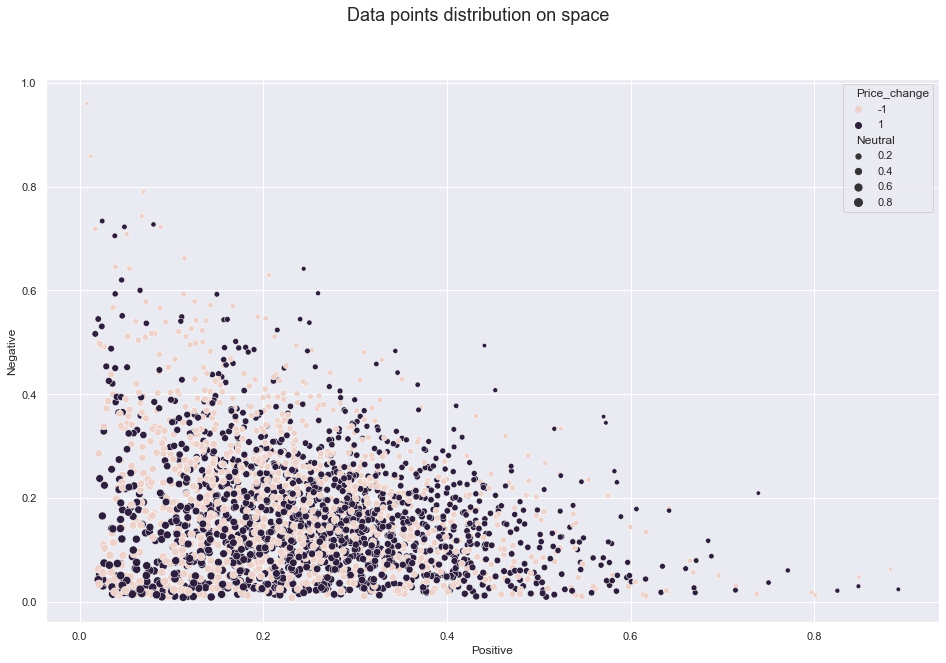

In [91]:
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Data points distribution on space", fontsize=18)
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', hue = 'Price_change')
plt.show()

### Logistic Regression

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg
Mean accs :  0.5774992631889184
Mean f1_macro 0.5192960850394386
Mean precision 0.5780817172879195
Mean recall 0.5498896568444965


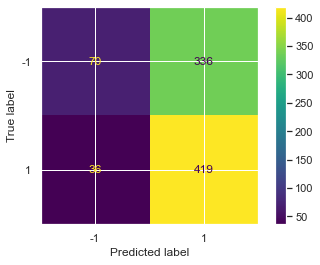

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.5774992631889184
Mean f1_macro 0.5192960850394386
Mean precision 0.5780817172879195
Mean recall 0.5498896568444965


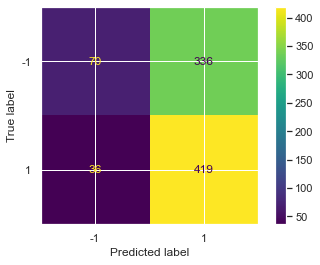

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.5778824049513704
Mean f1_macro 0.5198586484338967
Mean precision 0.5783603242530935
Mean recall 0.5503133856580559


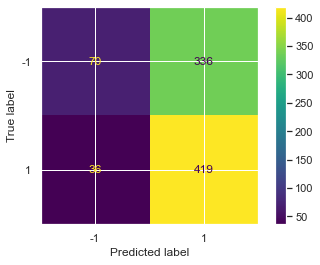

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.5774992631889184
Mean f1_macro 0.5192960850394386
Mean precision 0.5780817172879195
Mean recall 0.5498896568444965


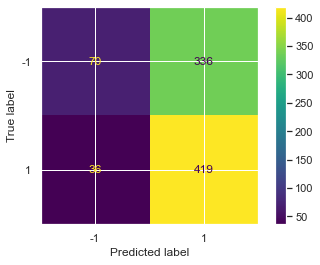

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  saga
Mean accs :  0.5774992631889184
Mean f1_macro 0.5192960850394386
Mean precision 0.5780817172879195
Mean recall 0.5498896568444965


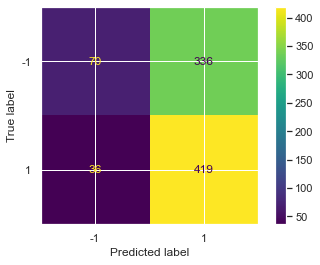

In [90]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    logisticRegr.predict(X_test[0].reshape(1,-1))

    cv_scores = cross_validate(logisticRegr, X, y, cv=10, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

### All logistic regression solver provide very similar results. 

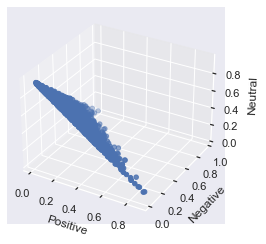

In [37]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x_plot = data['Positive']
y_plot = data['Negative']
z_plot = data['Neutral']

ax.set_xlabel("Positive")
ax.set_ylabel("Negative")
ax.set_zlabel("Neutral")

ax.scatter(x_plot, y_plot, z_plot)

plt.show()

## Nearest Neighbors

------------------------------------------------------------------------------------------
Training with k =  2
Mean accs :  0.4927100109574131
Mean f1_macro 0.4814122897069687
Mean precision 0.565334537793208
Mean recall 0.51104742585185


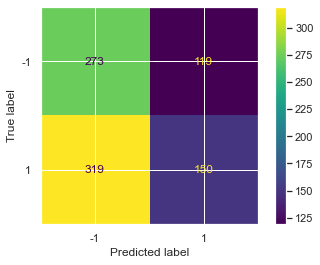

------------------------------------------------------------------------------------------
Training with k =  5
Mean accs :  0.5341216787639449
Mean f1_macro 0.5256780493631604
Mean precision 0.5696178216433285
Mean recall 0.5266201480892817


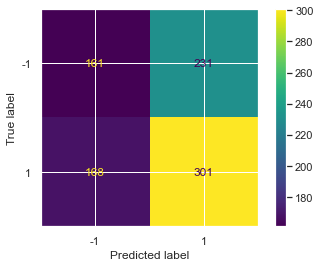

------------------------------------------------------------------------------------------
Training with k =  10
Mean accs :  0.5164912745162927
Mean f1_macro 0.5140190544529768
Mean precision 0.5600707278535472
Mean recall 0.5148168082853435


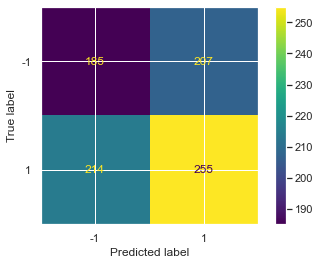

------------------------------------------------------------------------------------------
Training with k =  50
Mean accs :  0.555226833160515
Mean f1_macro 0.5315871603525603
Mean precision 0.5749911966138292
Mean recall 0.5390472105949359


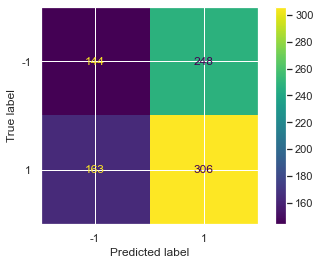

------------------------------------------------------------------------------------------
Training with k =  100
Mean accs :  0.574028724601231
Mean f1_macro 0.5375105405113085
Mean precision 0.5815901184888562
Mean recall 0.5524947923645966


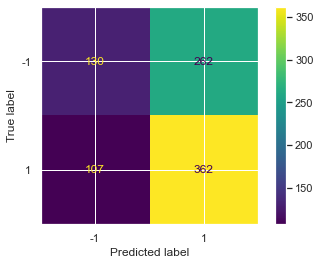

------------------------------------------------------------------------------------------
Training with k =  200
Mean accs :  0.5751766790948736
Mean f1_macro 0.5269846439583115
Mean precision 0.5788119030229416
Mean recall 0.550101105077618


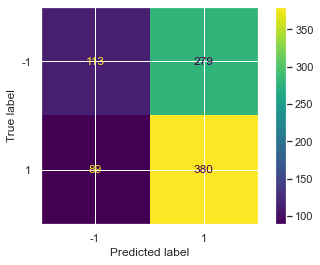

In [54]:
for k in [2, 5 ,10, 50, 100, 200]:
    print("---------"*10)
    print("Training with k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Cross 5 fold validation
    cv_scores = cross_validate(knn, X, y, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = knn.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    plt.show()

### Choosing k=100 as optimal nearest neighbors parameter

In [52]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5714285714285714


## SVM 

------------------------------------------------------------------------------------------
Training SVM with kernel  rbf
Mean accs :  0.5648178789683853
Mean f1_macro 0.4865770843163634
Mean precision 0.5667923297804511
Mean recall 0.5332770522573931


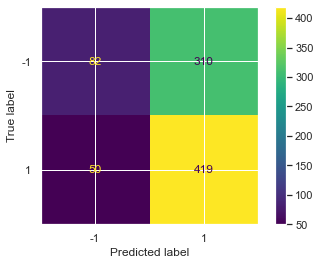

------------------------------------------------------------------------------------------
Training SVM with kernel  poly
Mean accs :  0.559827475897368
Mean f1_macro 0.4532782440647204
Mean precision 0.5598936163504479
Mean recall 0.5231784017876905


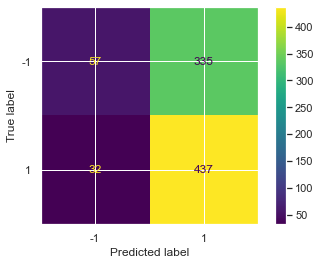

------------------------------------------------------------------------------------------
Training SVM with kernel  sigmoid
Mean accs :  0.5272280686272348
Mean f1_macro 0.44508768178772484
Mean precision 0.5534066623063935
Mean recall 0.5043328174063616


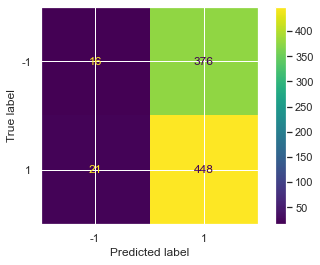

------------------------------------------------------------------------------------------
Training SVM with kernel  linear
Mean accs :  0.5498474051521904
Mean f1_macro 0.4100953852793312
Mean precision 0.5521079352769758
Mean recall 0.5090903287026775


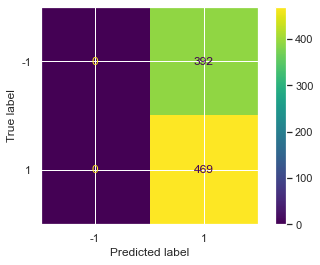

In [57]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel ", kernel)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
     # Cross 5 fold validation
    cv_scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
    disp.plot()
    plt.show()

### Choosing kernel rbf as it offers the best mean accuracy on cross validation as well as a balanced confusion matrix. 

In [59]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
print(f'Kernel: {kernel}, score: {clf.score(X_test, y_test)}')

Kernel: linear, score: 0.5818815331010453


## Random Forest Classifier

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.5199358733940771
Mean f1_macro 0.4662499111058824
Mean precision 0.5626025217707422
Mean recall 0.5110827149040091


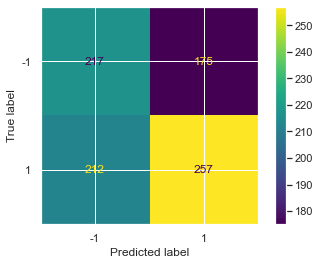

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.5759488457946331
Mean f1_macro 0.5256656229492614
Mean precision 0.5795977874155727
Mean recall 0.5505661743789998


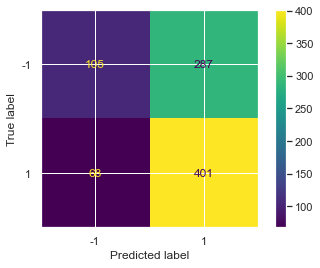

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.5774843544318691
Mean f1_macro 0.5299819553136867
Mean precision 0.581250684283877
Mean recall 0.5527700336527784


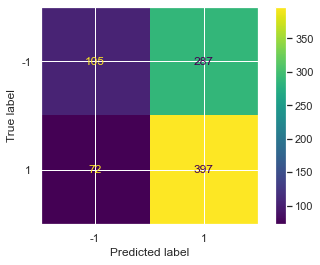

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.5725027761231349
Mean f1_macro 0.5234507898002243
Mean precision 0.5780989399954304
Mean recall 0.5479227968364025


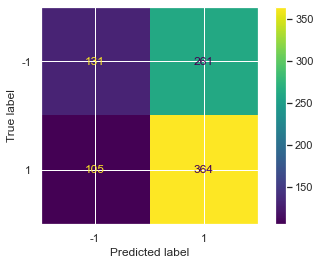

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 15
Mean accs :  0.5694295526580919
Mean f1_macro 0.5161111538818142
Mean precision 0.5753108785974861
Mean recall 0.543874182254697


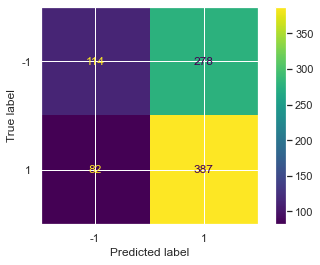

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 20
Mean accs :  0.5671307020833792
Mean f1_macro 0.5175941645899875
Mean precision 0.5744963583405499
Mean recall 0.5423787226147234


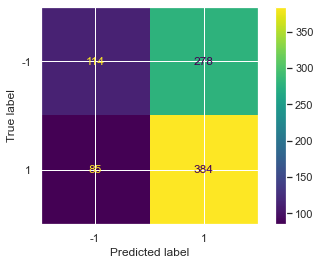

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 50
Mean accs :  0.560612144343695
Mean f1_macro 0.5215504951038197
Mean precision 0.574401445225648
Mean recall 0.5395055810843027


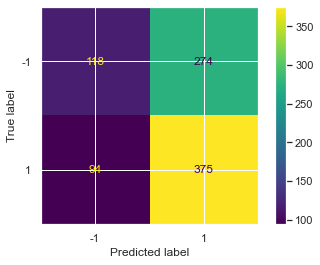

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.5199358733940771
Mean f1_macro 0.4662499111058824
Mean precision 0.5626025217707422
Mean recall 0.5110827149040091


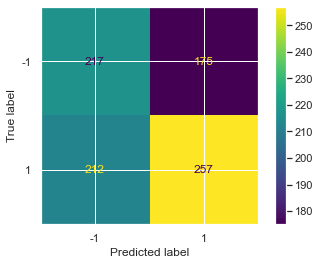

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.5759488457946331
Mean f1_macro 0.5256656229492614
Mean precision 0.5795977874155727
Mean recall 0.5505661743789998


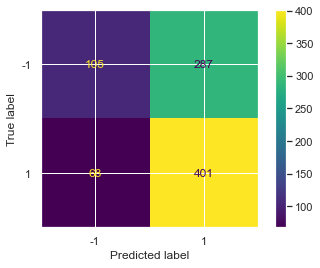

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.5763319875570853
Mean f1_macro 0.5283149451734396
Mean precision 0.5803346967905473
Mean recall 0.5514988472121005


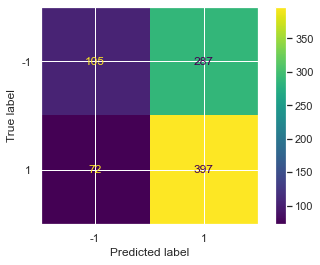

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.5705804487391621
Mean f1_macro 0.516621526001668
Mean precision 0.575716410448908
Mean recall 0.5447811105924906


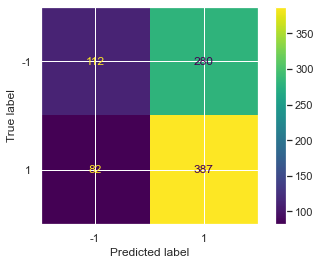

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 15
Mean accs :  0.5652149932711187
Mean f1_macro 0.5054292437504166
Mean precision 0.5708695872479176
Mean recall 0.5378334728502413


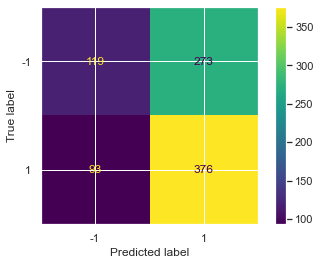

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 20
Mean accs :  0.5571535729256293
Mean f1_macro 0.4997164966079627
Mean precision 0.567316799190985
Mean recall 0.5303872928037044


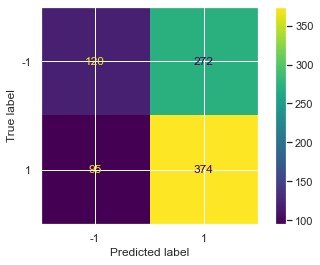

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 50
Mean accs :  0.5441201344305454
Mean f1_macro 0.506767242420292
Mean precision 0.562393172937665
Mean recall 0.5229518270397797


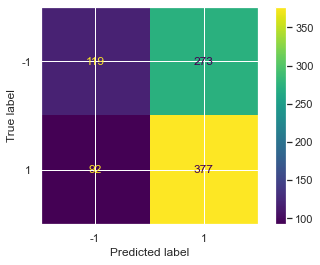

In [64]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 10, 15, 20, 50] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

##### Choosing entropy as best criterion for random forest and number of leaf nodes restricted to  5 .

Accuracy on Test set for 'optimal' random forest is : 0.5795586527293844


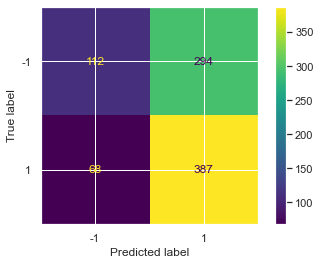

In [87]:
rf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
# cONFUSION matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()

In [85]:
rf.feature_importances_

array([0.21579609, 0.62402821, 0.1601757 , 0.        ])

# Add Volume as feature

In [76]:
# Normalize volume feature
data['Volume'] = (data['Volume'] - data['Volume'].min())/(data['Volume'].max()-data['Volume'].min())
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,0.102127,1136.520020,0.157785,0.489590,0.352625,1
1,1,2010-01-06,0.088126,1137.140015,0.159253,0.114102,0.726645,1
2,2,2010-01-07,0.116212,1141.689941,0.441000,0.012006,0.546994,1
3,3,2010-01-08,0.138638,1144.979980,0.039152,0.384472,0.576376,1
4,4,2010-01-11,0.067930,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...,...
2603,2603,2020-06-05,0.230116,3193.929932,0.567891,0.070503,0.361606,1
2604,2604,2020-06-08,0.211770,3232.389893,0.523481,0.124646,0.351873,1
2605,2605,2020-06-09,0.273027,3207.179932,0.296441,0.337487,0.366072,-1
2606,2606,2020-06-10,0.348928,3190.139893,0.390972,0.240399,0.368628,-1


In [77]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral', 'Volume']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

In [78]:
X_train

array([[0.1703185 , 0.24257228, 0.58710924, 0.14352944],
       [0.18438676, 0.30778508, 0.50782816, 0.06967683],
       [0.32357698, 0.13986592, 0.53655711, 0.05675631],
       ...,
       [0.36398429, 0.10705685, 0.52895885, 0.15480776],
       [0.30926944, 0.15803087, 0.53269966, 0.07591791],
       [0.21016868, 0.22208025, 0.56775107, 0.11588503]])

In [79]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5679442508710801


In [80]:
cv_scores = cross_validate(logisticRegr, X, y, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.5763268397790868
Mean f1_macro 0.5173749686416145


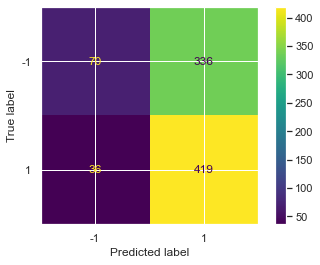

In [81]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

## SVM

In [82]:
from sklearn import svm

for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    print(f'Kernel: {kernel}, score: {clf.score(X_test, y_test)}')

Kernel: rbf, score: 0.554006968641115
Kernel: poly, score: 0.5435540069686411
Kernel: sigmoid, score: 0.5238095238095238
Kernel: linear, score: 0.5284552845528455


## Decision Tree

In [83]:
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.5749128919860628

In [48]:
clf.feature_importances_

array([0.56125451, 0.06156394, 0.1181734 , 0.25900814])